In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import glob
import pickle
import pandas as pd
import numpy as np
from plotnine import (ggplot, 
                      labs,  
                      geom_line, 
                      geom_point,
                      geom_errorbar,
                      aes, 
                      ggsave, 
                      theme_bw,
                      theme,
                      scale_color_manual,
                      element_blank,
                      element_text,
                      element_rect,
                      element_line)
import warnings
warnings.filterwarnings(action='ignore')

from numpy.random import seed
randomState = 123
seed(randomState)

In [2]:
# File directories
local_dir = "/home/alexandra/Documents/"

similarity_uncorrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "saved variables",
    "analysis_1_similarity_uncorrected.pickle")

ci_uncorrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "saved variables",
    "analysis_1_ci_uncorrected.pickle")

similarity_corrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "saved variables",
    "analysis_1_similarity_corrected.pickle")

ci_corrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "saved variables",
    "analysis_1_ci_corrected.pickle")

permuted_score_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "saved variables",
    "analysis_1_permuted.txt.npy")

In [3]:
# Output files
svcca_uncorrected_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "talk figures",
    "analysis_1_svcca_uncorrected.png")

svcca_uncorrected_blk_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "talk figures",
    "analysis_1_svcca_uncorrected_blk.png")

svcca_overlay_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "talk figures",
    "analysis_1_svcca_overlay.png")

svcca_overlay_blk_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "talk figures",
    "analysis_1_svcca_overlay_blk.png")

svcca_overlay_long_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "talk figures",
    "analysis_1_svcca_overlay_long.png")

svcca_overlay_long_blk_file = os.path.join(
    local_dir,
    "Data",
    "Batch_effects",
    "output",
    "talk figures",
    "analysis_1_svcca_overlay_long_blk.png")

In [4]:
# Load pickled files
uncorrected_svcca = pd.read_pickle(similarity_uncorrected_file)
err_uncorrected_svcca = pd.read_pickle(ci_uncorrected_file)
corrected_svcca = pd.read_pickle(similarity_corrected_file)
err_corrected_svcca = pd.read_pickle(ci_corrected_file)
permuted_score = np.load(permuted_score_file)

In [5]:
# Concatenate error bars
uncorrected_svcca_err = pd.concat([uncorrected_svcca, err_uncorrected_svcca], axis=1)
corrected_svcca_err = pd.concat([corrected_svcca, err_corrected_svcca], axis=1)

In [6]:
# Add group label
uncorrected_svcca_err['Group'] = 'uncorrected'
corrected_svcca_err['Group'] = 'corrected'

In [7]:
# Concatenate dataframes
all_svcca = pd.concat([uncorrected_svcca_err, corrected_svcca_err])
all_svcca

,score,ymin,ymax,Group
number of partitions,,,,
1,0.999993,0.999993,0.999993,uncorrected
2,0.904241,0.901986,0.906497,uncorrected
3,0.812530,0.808823,0.816238,uncorrected
5,0.632527,0.627384,0.637671,uncorrected
10,0.244983,0.237612,0.252353,uncorrected
20,0.331793,0.318677,0.344909,uncorrected
30,0.369350,0.357955,0.380746,uncorrected
50,0.442240,0.421927,0.462554,uncorrected
70,0.508020,0.490248,0.525792,uncorrected


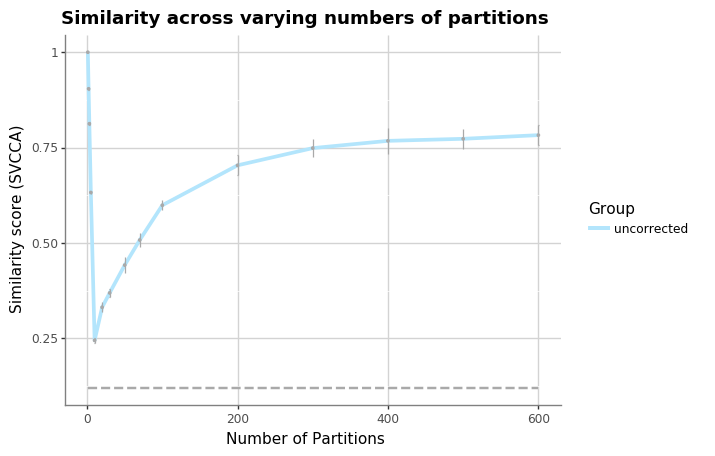

<ggplot: (-9223363286681476131)>


In [8]:
# Plot - uncorrected only
lst_num_experiments = list(all_svcca.index[0:int(len(all_svcca.index)/2)])

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

g = ggplot(all_svcca[all_svcca['Group'] == 'uncorrected']) \
    + geom_line(all_svcca[all_svcca['Group'] == 'uncorrected'],
                aes(x=lst_num_experiments, y='score', color='Group'),
                size=1.5) \
    + geom_point(aes(x=lst_num_experiments, y='score'), 
                 color ='darkgrey',
                size=0.5) \
    + geom_errorbar(all_svcca[all_svcca['Group'] == 'uncorrected'],
                  aes(x=lst_num_experiments, ymin='ymin', ymax='ymax'),
                   color='darkgrey') \
    + geom_line(threshold, 
                aes(x=lst_num_experiments, y='score'), 
                linetype='dashed',
                size=1,
                color="darkgrey",
                show_legend=False) \
    + labs(x = "Number of Partitions", 
           y = "Similarity score (SVCCA)", 
           title = "Similarity across varying numbers of partitions") \
    + theme(plot_title=element_text(weight='bold'),
            plot_background=element_rect(fill="white"),
            panel_background=element_rect(fill="white"),
            panel_grid_major_x=element_line(color="lightgrey"),
            panel_grid_major_y=element_line(color="lightgrey"),
            axis_line=element_line(color="grey"),
            legend_key=element_rect(fill='white', colour='white')
           ) \
    + scale_color_manual(['#b3e5fc']) \


print(g)
ggsave(plot=g, filename=svcca_uncorrected_file, dpi=300)

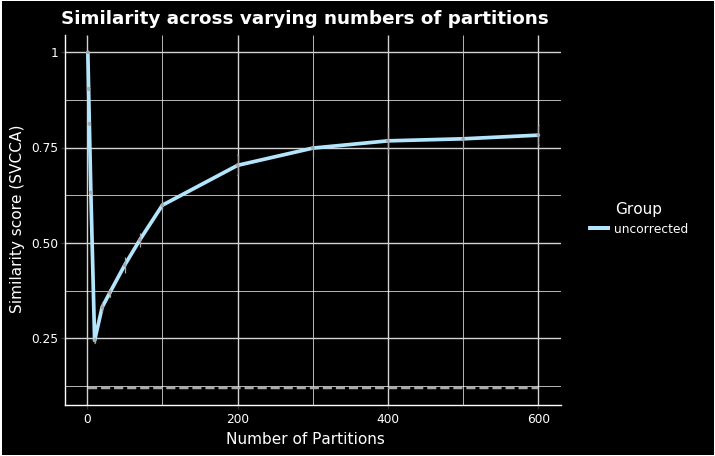

<ggplot: (8750152851923)>


In [9]:
# Plot - black
lst_num_experiments = list(all_svcca.index[0:int(len(all_svcca.index)/2)])

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

g = ggplot(all_svcca[all_svcca['Group'] == 'uncorrected']) \
    + geom_line(all_svcca[all_svcca['Group'] == 'uncorrected'],
                aes(x=lst_num_experiments, y='score', color='Group'),
                size=1.5) \
    + geom_point(aes(x=lst_num_experiments, y='score'), 
                 color ='darkgrey',
                size=0.5) \
    + geom_errorbar(all_svcca[all_svcca['Group'] == 'uncorrected'],
                  aes(x=lst_num_experiments, ymin='ymin', ymax='ymax'),
                   color='darkgrey') \
    + geom_line(threshold, 
                aes(x=lst_num_experiments, y='score'), 
                linetype='dashed',
                size=1,
                color="darkgrey",
                show_legend=False) \
    + labs(x = "Number of Partitions", 
           y = "Similarity score (SVCCA)", 
           title = "Similarity across varying numbers of partitions") \
    + theme(plot_background=element_rect(fill='black'),
        legend_title_align = "center",
        legend_background=element_rect(fill='black', colour='black'),
        legend_key=element_rect(fill='black', colour='black'), 
        legend_title=element_text(colour="white"),
        legend_text=element_text(colour="white"),
        plot_title=element_text(weight='bold', colour="white"),
        panel_background=element_rect(fill="black"),
        axis_line=element_line(color="white"),
        axis_text=element_text(color="white"),
        axis_title=element_text(color="white"),
        panel_grid_major_x=element_line(color="lightgrey"),
        panel_grid_major_y=element_line(color="lightgrey"),
        strip_text=element_text(colour="white"),
        strip_background=element_blank()
           ) \
    + scale_color_manual(['#b3e5fc']) \


print(g)
ggsave(plot=g, filename=svcca_uncorrected_blk_file, dpi=300)

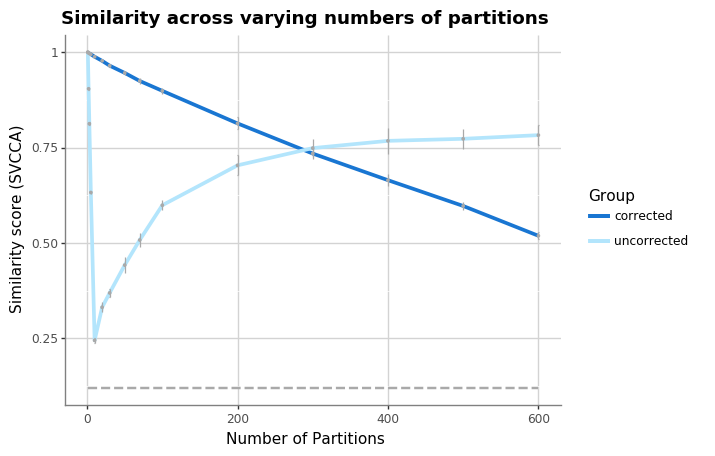

<ggplot: (-9223363286681506791)>


In [10]:
# Plot
lst_num_experiments = list(all_svcca.index)

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

g = ggplot(all_svcca) \
    + geom_line(all_svcca,
                aes(x=lst_num_experiments, y='score', color='Group'),
                size=1.5) \
    + geom_point(aes(x=lst_num_experiments, y='score'), 
                 color ='darkgrey',
                size=0.5) \
    + geom_errorbar(all_svcca,
                  aes(x=lst_num_experiments, ymin='ymin', ymax='ymax'),
                   color='darkgrey') \
    + geom_line(threshold, 
                aes(x=lst_num_experiments, y='score'), 
                linetype='dashed',
                size=1,
                color="darkgrey",
                show_legend=False) \
    + labs(x = "Number of Partitions", 
           y = "Similarity score (SVCCA)", 
           title = "Similarity across varying numbers of partitions") \
    + theme(plot_title=element_text(weight='bold'),
            plot_background=element_rect(fill="white"),
            panel_background=element_rect(fill="white"),
            panel_grid_major_x=element_line(color="lightgrey"),
            panel_grid_major_y=element_line(color="lightgrey"),
            axis_line=element_line(color="grey"),
            legend_key=element_rect(fill='white', colour='white')
           ) \
    + scale_color_manual(['#1976d2', '#b3e5fc']) \


print(g)
ggsave(plot=g, filename=svcca_overlay_file, dpi=300)

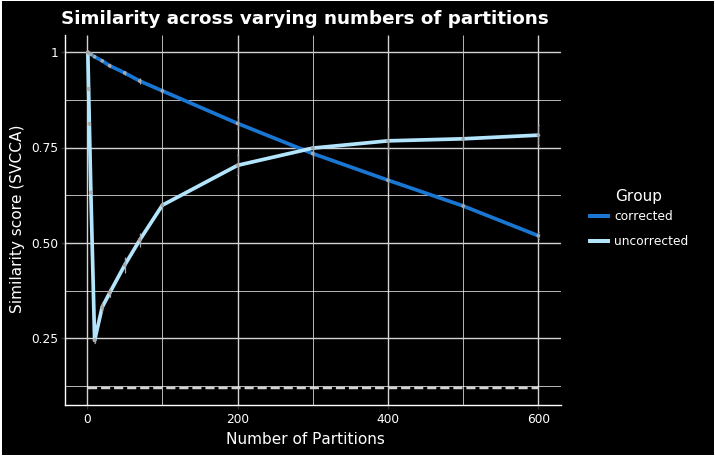

<ggplot: (8750131793293)>


In [11]:
# Plot - black
lst_num_experiments = list(all_svcca.index)

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

g = ggplot(all_svcca) \
    + geom_line(all_svcca,
                aes(x=lst_num_experiments, y='score', color='Group'),
                size=1.5) \
    + geom_point(aes(x=lst_num_experiments, y='score'), 
                 color ='darkgrey',
                size=0.5) \
    + geom_errorbar(all_svcca,
                  aes(x=lst_num_experiments, ymin='ymin', ymax='ymax'),
                   color='darkgrey') \
    + geom_line(threshold, 
                aes(x=lst_num_experiments, y='score'), 
                linetype='dashed',
                size=1,
                color="lightgrey",
                show_legend=False) \
    + labs(x = "Number of Partitions", 
           y = "Similarity score (SVCCA)", 
           title = "Similarity across varying numbers of partitions") \
    + theme(plot_background=element_rect(fill='black'),
        legend_title_align = "center",
        legend_background=element_rect(fill='black', colour='black'),
        legend_key=element_rect(fill='black', colour='black'), 
        legend_title=element_text(colour="white"),
        legend_text=element_text(colour="white"),
        plot_title=element_text(weight='bold', colour="white"),
        panel_background=element_rect(fill="black"),
        axis_line=element_line(color="white"),
        axis_text=element_text(color="white"),
        axis_title=element_text(color="white"),
        panel_grid_major_x=element_line(color="lightgrey"),
        panel_grid_major_y=element_line(color="lightgrey"),
        strip_text=element_text(colour="white"),
        strip_background=element_blank()
           ) \
    + scale_color_manual(['#1976d2', '#b3e5fc']) \


print(g)
ggsave(plot=g, filename=svcca_overlay_blk_file, dpi=300)

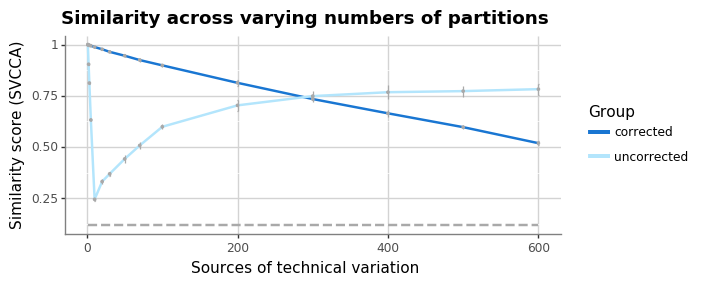

<ggplot: (8750173307049)>


In [12]:
# Plot - elongated
lst_num_experiments = list(all_svcca.index)

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

g = ggplot(all_svcca) \
    + geom_line(all_svcca,
                aes(x=lst_num_experiments, y='score', color='Group'),
                size=1) \
    + geom_point(aes(x=lst_num_experiments, y='score'), 
                 color ='darkgrey',
                size=0.5) \
    + geom_errorbar(all_svcca,
                  aes(x=lst_num_experiments, ymin='ymin', ymax='ymax'),
                   color='darkgrey') \
    + geom_line(threshold, 
                aes(x=lst_num_experiments, y='score'), 
                linetype='dashed',
                size=1,
                color="darkgrey",
                show_legend=False) \
    + labs(x = "Sources of technical variation", 
           y = "Similarity score (SVCCA)", 
           title = "Similarity across varying numbers of partitions") \
    + theme(plot_title=element_text(weight='bold'),
            plot_background=element_rect(fill="white"),
            panel_background=element_rect(fill="white"),
            panel_grid_major_x=element_line(color="lightgrey"),
            panel_grid_major_y=element_line(color="lightgrey"),
            axis_line=element_line(color="grey"),
            legend_key=element_rect(fill='white', colour='white'),
            aspect_ratio=0.4
           ) \
    + scale_color_manual(['#1976d2', '#b3e5fc']) \


print(g)
ggsave(plot=g, filename=svcca_overlay_long_file, dpi=300)

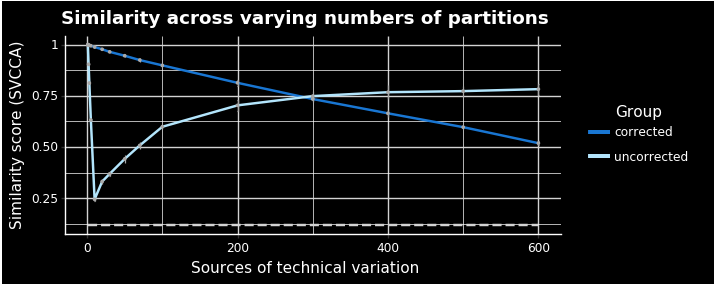

<ggplot: (8750131651199)>


In [13]:
# Plot - black
lst_num_experiments = list(all_svcca.index)

threshold = pd.DataFrame(
    pd.np.tile(
        permuted_score,
        (len(lst_num_experiments), 1)),
    index=lst_num_experiments,
    columns=['score'])

g = ggplot(all_svcca) \
    + geom_line(all_svcca,
                aes(x=lst_num_experiments, y='score', color='Group'),
                size=1) \
    + geom_point(aes(x=lst_num_experiments, y='score'), 
                 color ='darkgrey',
                size=0.5) \
    + geom_errorbar(all_svcca,
                  aes(x=lst_num_experiments, ymin='ymin', ymax='ymax'),
                   color='darkgrey') \
    + geom_line(threshold, 
                aes(x=lst_num_experiments, y='score'), 
                linetype='dashed',
                size=1,
                color="lightgrey",
                show_legend=False) \
    + labs(x = "Sources of technical variation", 
           y = "Similarity score (SVCCA)", 
           title = "Similarity across varying numbers of partitions") \
    + theme(plot_background=element_rect(fill='black'),
        legend_title_align = "center",
        legend_background=element_rect(fill='black', colour='black'),
        legend_key=element_rect(fill='black', colour='black'), 
        legend_title=element_text(colour="white"),
        legend_text=element_text(colour="white"),
        plot_title=element_text(weight='bold', colour="white"),
        panel_background=element_rect(fill="black"),
        axis_line=element_line(color="white"),
        axis_text=element_text(color="white"),
        axis_title=element_text(color="white"),
        panel_grid_major_x=element_line(color="lightgrey"),
        panel_grid_major_y=element_line(color="lightgrey"),
        strip_text=element_text(colour="white"),
        aspect_ratio=0.4,
        strip_background=element_blank()
           ) \
    + scale_color_manual(['#1976d2', '#b3e5fc']) \


print(g)
ggsave(plot=g, filename=svcca_overlay_long_blk_file, dpi=300)